<a href="https://colab.research.google.com/github/TE-Yoon/ML-training/blob/main/MLlab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x_data = [1,2,3,4,5,6]
y_data = [1,2,3,4,5,6]


0 loss: 5.0231323 W: 0.5134312 b: -0.37850243
100 loss: 0.005841978 W: 1.0406988 b: -0.17423931
200 loss: 0.0028118603 W: 1.0282357 b: -0.120882496
300 loss: 0.001353403 W: 1.0195892 b: -0.08386495
400 loss: 0.0006514204 W: 1.0135903 b: -0.05818314
500 loss: 0.00031354462 W: 1.0094286 b: -0.040365897
600 loss: 0.00015091307 W: 1.0065413 b: -0.028004661
700 loss: 7.263726e-05 W: 1.0045382 b: -0.01942879
800 loss: 3.4961664e-05 W: 1.0031484 b: -0.013479192
900 loss: 1.6827837e-05 W: 1.0021844 b: -0.009351573
final loss: 8.159761e-06 W: 1.001521 b: -0.006511825


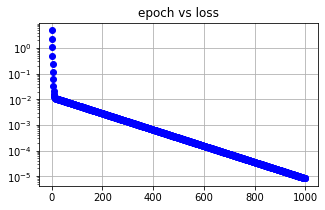

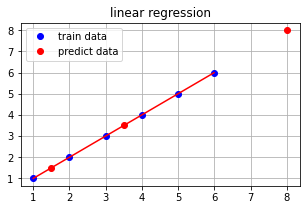

In [10]:
### 1. linear regression parameter : W, b --> random variable 설정
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

### 2. hyposis : linear / cost function : mse
def cost_function():
  hyposis = W*x_data + b
  return tf.reduce_mean((hyposis - y_data) **2 )
# tf.reduce_mean : matrix 내 모든 요소를 mean 으로 계산함.


### 3. optimize 방법 : Gradient descent 설정.
optimizer = tf.optimizers.SGD(lr=0.01)

### 4. 학습 진행 및 결과 visualization
epoch = 1000
history = np.zeros(epoch)

plt.figure(figsize=(5,3))
plt.title("epoch vs loss")

for i in range(epoch):
  optimizer.minimize(cost_function , var_list=[W,b])
  history[i] = cost_function()
  plt.plot(i,history[i],'bo')
  if i%100 == 0:
    print(i, 'loss:', cost_function().numpy(), "W:", W.numpy() , "b:", b.numpy())
print('final loss:', cost_function().numpy(), "W:", W.numpy() , "b:", b.numpy())
plt.yscale("log")
plt.grid(True)
plt.show()

linex = np.arange(min(x_data),max(x_data), 0.01)
liney = W*linex + b
plt.figure(figsize=(5,3))
plt.title("linear regression")
plt.plot(x_data,y_data,'bo',label='train data')
plt.plot(linex,liney,'r-')

### 5. 도출된 model 을 이용하여 prediction
x_pred = [1.5, 3.5, 8]
y_pred = W*x_pred + b

plt.plot(x_pred,y_pred, 'ro',label='predict data')
plt.grid(True)
plt.legend()
plt.show()


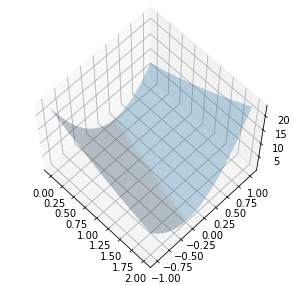

In [18]:
### 번외. all space search 후 최적 위치 찾기.
# cost function 의 all space visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

xn = 100
x0 = np.linspace(0.0,2,xn)
x1 = np.linspace(-1.0,1,xn)
y = np.zeros((len(x0),len(x1)))

def cost_function_forplot():
  hyposis = W*np.array(x_data) + b                # python list 는 float와 연산 불가이므로, numpy array 로 변경필요.
  return tf.reduce_mean((hyposis - y_data) **2 )

for i in range(xn):
  for j in range(xn):
    W = x0[i]
    b = x1[j]
    y[i,j] = cost_function_forplot()

xx0, xx1 = np.meshgrid(x0,x1)
plt.figure(figsize = (5,5))
ax = plt.subplot(1,1,1, projection = '3d')
ax.plot_surface(xx0, xx1, y, rstride=1, cstride=1, alpha=0.3)

ax.view_init(65,-45)
plt.show()


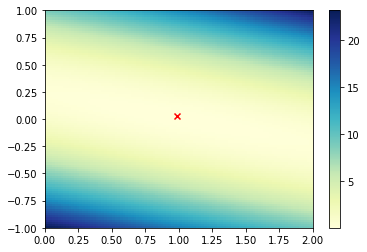

min point is W: 0.98989898989899 b: 0.030303030303030498 value: 0.0003230962826922397


In [17]:
# search 한 space 에서 가장 작은 loss 를 갖는 위치 찾기.
index = np.unravel_index(np.argmin(y, axis=None), y.shape)
print("min point is", "W:", x0[index[0]], "b:", x1[index[1]], "value:", y[index])
# color map 으로 표기.
plt.pcolor(x0,x1,y, cmap='YlGnBu' ) 
plt.colorbar() 
minindex = np.unravel_index(np.argmin(y, axis=None), y.shape)
plt.scatter(x0[minindex[0]],x1[minindex[1]], marker="x", c='red')
plt.show()
print("min point is", "W:", x0[index[0]], "b:", x1[index[1]], "value:", y[index])

In [ ]:
## 2차원 matrix 에서 list 로 armin 뽑기
tempx = np.array([[5,4,3,2,1],[0,1,2,3,4],[-33,-4,5,6,7]])
np.unravel_index(np.argmin(tempx, axis=None), tempx.shape)

(2, 0)

In [ ]:
### 번외2. normal equation 으로 min 위치 찾기.

X = np.matrix(x_data)
X_trans = np.matrix.getT(X)

y = np.matrix(y_data)
y_trans = np.matrix.getT(y)

b_vec = np.ones((len(X_trans),1))
X_mat = np.concatenate((X_trans,b_vec),axis=1)

solution = np.matmul(np.matmul(np.matrix.getI(np.matmul(X_mat.T,X_mat)),X_mat.T),y_trans)

x_pred = [3.5, 8 ,10]
y_pred2 = solution*x_pred
# print('y_pred (by linear regression):', y_pred.numpy())
print('y_pred (by normal equation):', y_pred2)


y_pred (by normal equation): [[ 3.50000000e+00  8.00000000e+00  1.00000000e+01]
 [-4.66293670e-15 -1.06581410e-14 -1.33226763e-14]]
